In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_file = 'JIRA.csv'
df = pd.read_csv(dataset_file, delimiter=';', encoding='ISO-8859-1')

In [3]:
X = df.drop('Statut ', axis=1)
y = df['Statut ']

In [4]:
categorical_columns = ['Etat','Priorite', 'Responsable','Createur','date-creation ', 'date-generation-comportement', 'Temps-prise-en-charge', 'date-resolution','Categorie','Sous-Categorie']

In [5]:
X = pd.get_dummies(X, columns=categorical_columns)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
models = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("KNN", KNeighborsClassifier()),
    ("Logistic Regression", LogisticRegression())
]
model_accuracies = []
model_names = []

In [8]:
model_names = []
model_accuracies = []
model_predictions = []

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies.append(accuracy)
    model_names.append(model_name)
    model_predictions.append(y_pred)

In [9]:
model_accuracies_percent = [accuracy * 100 for accuracy in model_accuracies]

In [10]:
table_data = list(zip(model_names, model_accuracies_percent))
table_columns = ["Model", "Accuracy"]
table = pd.DataFrame(data=table_data, columns=table_columns)

print("\nModel Accuracies:")
print(table)


Model Accuracies:
                 Model  Accuracy
0        Decision Tree     100.0
1                  KNN     100.0
2  Logistic Regression     100.0


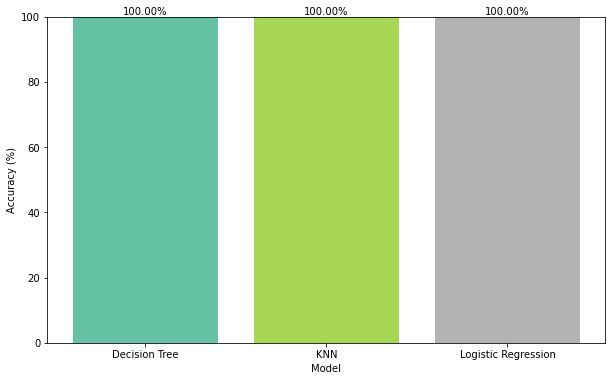

In [11]:
plt.figure(figsize=(10, 6))
colors = plt.cm.get_cmap('Set2', len(model_names))
barplot = plt.bar(model_names, model_accuracies_percent, color=colors(range(len(model_names))))
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.ylim([0, 100])

for i, rect in enumerate(barplot):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, f"{model_accuracies_percent[i]:.2f}%", ha='center', va='bottom')

plt.show()

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text

# Chargement du jeu de données Iris
iris = load_iris()
X = iris.data
y = iris.target

# Création du modèle d'arbre de décision
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Affichage des règles de décision
tree_rules = export_text(clf, feature_names=iris.feature_names)
print(tree_rules)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



In [2]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz

In [3]:
# Chargement du jeu de données Iris
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
# Création du modèle d'arbre de décision
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

In [5]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Générer le graphe de l'arbre de décision au format DOT
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)

In [7]:
graph = graphviz.Source(dot_data)

In [8]:
graph.view()

'Source.gv.pdf'